# Support Vector Machine with wine-quality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./winequality/winequality-data.csv")

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [4]:
df= df.iloc[:,0:-1]
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


In [5]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
df['quality'].value_counts().sort_values(ascending=False)

6    1752
5    1163
7     707
8     140
4     134
3      17
Name: quality, dtype: int64

퀄리티 svm에서 5개 미만이면 warning뜸!
(아얘 다섯개 밑인건 데이터 삭제) ==> 성능이구림>_<


# Split into train, validation, test set

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 2200,  size of validation set: 734,  size of test set: 979


# Test with validation set

In [8]:
best_score = 0
# 감마랑 C라는 파라미터가 있음 svm모델 안에 있는 
# gomma 커널함숭서 시그마 c 

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련 
        # 모델 36개 트레인, 벨리데이션 테스트 xmfpdlsdmfh 36개의 조합에 대해 바로 테스트를 돌리면 36개중에 일반화 능력이 떨어져서 
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)       

최고 점수(모델 정확도): 0.5313351498637602
최적 매개변수: {'C': 10, 'gamma': 1}


In [9]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters) ## 베스트 파라미터를 다 가지고 온다는 것 
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

validation set에서 최고 점수:  0.5313351498637602
최적 매개변수:  {'C': 10, 'gamma': 1}
최적 매개변수에서 test set의 점수(모델 정확도):  0.6077630234933605


# Test with Cross Validation
밸리데이션 세트가 크가가 작음 743개 밖에 안됨,  
그럼 사실 validations에 좋단것도 일반화 능력이 떨어지기 ㄸ문에 
밸리데이션을 늘리고 싶어서 크로스 밸리데이션 


In [10]:
param_grid = {'C': [0.1, 0.2, 1, 2, 10],
              'gamma': [0.01, 0.1, 0.9, 1, 2, 3]} 
param_grid

{'C': [0.1, 0.2, 1, 2, 10], 'gamma': [0.01, 0.1, 0.9, 1, 2, 3]}

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 10, 'gamma': 1}
최상 교차검증 점수 :  0.5487389229720518
최고 성능 모델 :  SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [0]:
import pandas as pd
from IPython.display import display

In [0]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.233703,0.007786,0.037513,2.825920e-03,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.441426,0.442177,0.441227,...,0.442059,0.000875,21,0.446908,0.441176,0.445675,0.445486,0.441277,0.444104,0.002400
1,0.469514,0.021762,0.052477,1.983409e-04,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.438031,0.438776,0.439523,...,0.439673,0.001290,26,0.440085,0.439898,0.439710,0.439523,0.439149,0.439673,0.000322
2,0.769899,0.005893,0.080847,5.955694e-07,0.1,0.9,"{'C': 0.1, 'gamma': 0.9}",0.438031,0.438776,0.439523,...,0.439673,0.001290,26,0.440085,0.439898,0.439710,0.439523,0.439149,0.439673,0.000322
3,0.776837,0.006143,0.081146,3.963745e-04,0.1,1,"{'C': 0.1, 'gamma': 1}",0.438031,0.438776,0.439523,...,0.439673,0.001290,26,0.440085,0.439898,0.439710,0.439523,0.439149,0.439673,0.000322
4,0.816126,0.011866,0.083824,7.685695e-04,0.1,2,"{'C': 0.1, 'gamma': 2}",0.438031,0.438776,0.439523,...,0.439673,0.001290,26,0.440085,0.439898,0.439710,0.439523,0.439149,0.439673,0.000322
5,1.120664,0.370037,0.106244,3.769776e-02,0.1,3,"{'C': 0.1, 'gamma': 3}",0.438031,0.438776,0.439523,...,0.439673,0.001290,26,0.440085,0.439898,0.439710,0.439523,0.439149,0.439673,0.000322
6,0.233220,0.006848,0.036406,5.054791e-04,0.2,0.01,"{'C': 0.2, 'gamma': 0.01}",0.436333,0.457483,0.456559,...,0.451261,0.007859,19,0.489979,0.478261,0.479335,0.461244,0.482553,0.478274,0.009450
7,0.612864,0.124475,0.076285,2.862822e-02,0.2,0.1,"{'C': 0.2, 'gamma': 0.1}",0.438031,0.443878,0.441227,...,0.442399,0.002538,20,0.449467,0.448849,0.448658,0.443782,0.444255,0.447002,0.002455
8,1.007271,0.112216,0.118346,4.572544e-02,0.2,0.9,"{'C': 0.2, 'gamma': 0.9}",0.438031,0.438776,0.441227,...,0.440014,0.001423,22,0.444776,0.442029,0.443971,0.441652,0.441702,0.442826,0.001295
9,0.883286,0.189070,0.081152,4.016537e-04,0.2,1,"{'C': 0.2, 'gamma': 1}",0.438031,0.438776,0.441227,...,0.440014,0.001423,22,0.444776,0.442029,0.443971,0.441652,0.441702,0.442826,0.001295


C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


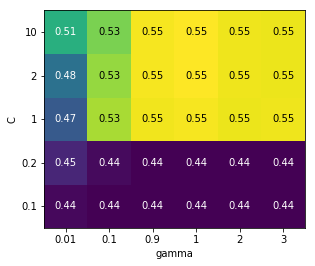

In [0]:
import mglearn
import matplotlib.pyplot as plt

scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(5, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()